In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping



In [3]:
df = pd.read_csv("C:/Users/min22/Desktop/Artifical intelligence/AAME.csv")

In [5]:
# 2. 날짜 정렬
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)


In [7]:
# 3. 사용할 피처 선택
features = ['Open', 'High', 'Low', 'Close']
data = df[features].values

In [9]:
# 4. 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [11]:
# 5. 시퀀스 데이터 생성
sequence_length = 30
X, y = [], []

In [13]:

for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i])
    y.append(data_scaled[i, 3])  # Close 값


In [15]:
X, y = np.array(X), np.array(y)

In [17]:
# 6. 학습/테스트 분할
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [19]:
# 7. LSTM 모델 정의
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(sequence_length, len(features))),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')


C:\Users\min22\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:

# 8. 모델 훈련
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0050 - val_loss: 2.9969e-05
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 2.0966e-04 - val_loss: 5.3829e-05
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 1.7826e-04 - val_loss: 2.7331e-05
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 1.6637e-04 - val_loss: 2.5326e-05
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.7608e-04 - val_loss: 2.6169e-05
Epoch 6/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 1.4166e-04 - val_loss: 2.3230e-05
Epoch 7/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 1.3770e-04 - val_loss: 2.3673e-05
Epoch 8/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 1.3261e-04 - val_loss: 3.5910e-05
Epoch 9/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 1.1841e-04 - val_loss: 3.5751e-05
Epoch 10/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 1.3231e-04 - val_loss: 2.2301e-05
Epoch 11/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step

In [23]:
# 9. 성능 평가
loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4047e-05
Test Loss (MSE): 4.0963055653264746e-05


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


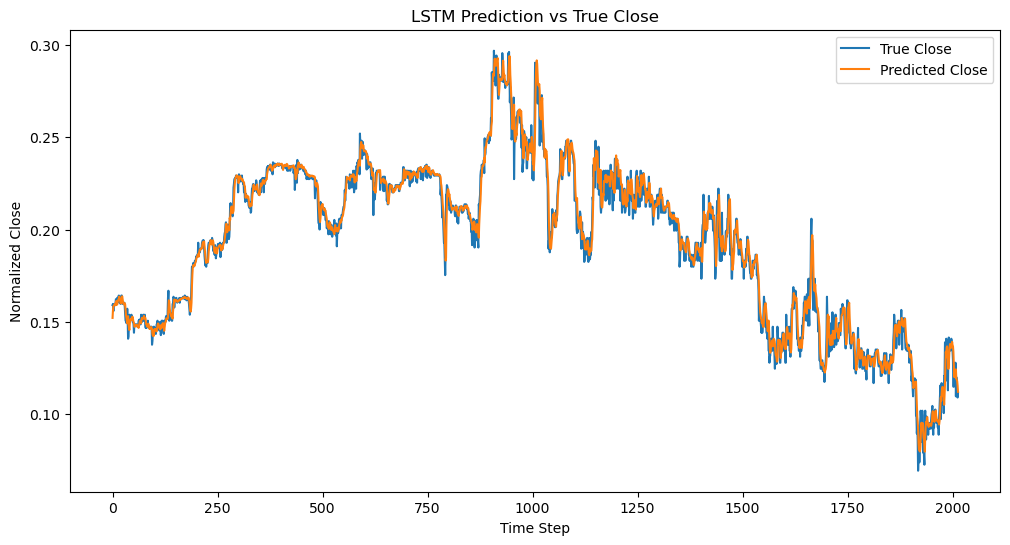

In [25]:
# 10. 예측 및 시각화
predicted = model.predict(X_test)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Close')
plt.plot(predicted, label='Predicted Close')
plt.legend()
plt.title("LSTM Prediction vs True Close")
plt.xlabel("Time Step")
plt.ylabel("Normalized Close")
plt.show()